# SENTIMENT ANALYSIS

Si vuole svolgere una sentiment analysis sui dati ottenuti dopo la pulizia e il clustering dei dati. Vogliamo perciç importare delle librerie e creare dei dataset utili a tale scopo.
Si rammenti che l'analisi verrà svolta solamente sui cluster relativi alle restrizioni in Texas, sui vaccini e sulle scuole. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer

data = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/clustered_data_KMeans.xlsx')
df_en=pd.DataFrame(data)

TexasDF  = df_en.loc[df_en['label_kmeans_01'] == 4].drop(['label_kmeans_05','label_kmeans_10','label_kmeans_PCA'],axis=1)
PharmaDF = df_en.loc[df_en['label_kmeans_01'] == 2].drop(['label_kmeans_05','label_kmeans_10','label_kmeans_PCA'],axis=1)
SchoolDF = df_en.loc[df_en['label_kmeans_01'] == 14].drop(['label_kmeans_05','label_kmeans_10','label_kmeans_PCA'],axis=1)

Per potere svolgere una sentiment analysis definiamo l'oggetto `SentimentIntensityAnalyzer()`, che andrà a valutare, parola per parola, la polarità di ogni tweet. Ad ogni tweet verranno associate quattro metriche. La prima indicherà quanto il tweet è positivo, la seconda quanto il tweet è negativo, la terza quanto è neutro e la quarta ("Compound") darà una valutazione complessiva della polarità tweet.

Proprio utilizzando la metrica compound riusciamo a capire se il tweet contenuto in un determinato cluster esprime dei sentimenti negativi o positivi. 

In [2]:
# Oggetto per svolgere la SA
sia = SentimentIntensityAnalyzer()

Definiamo ora la funzione `labeler` che, in base al valore di "Compound", associerà a ogni tweet una stringa che indicherà esplicitamente se il tweet ha contenuto positivo, negativo o neutro. 

In [3]:
# Questa funzione serve per etichettare i vari tweet
def labeler(val):
    if val > 0.05:
        return "positive"
    elif val < -0.05:
        return "negative"
    else:
        return "neutral"

## Sentiment Analysis, Texas

Ora modifichaimo il dataframe relativo al Texas e aggiungiamo usando `sia` e `labeler` delle colonne che indicano per ogni tweet le metriche e le etichette legate alla polarità del tweet. 

In [4]:
writer = pd.ExcelWriter('Polarity', engine='xlsxwriter')

# Calcolo i tweet positivi, negativi e neutri per il DF sul Texas
TexasDF['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in TexasDF.text_clean]
TexasDF['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in TexasDF.text_clean]
TexasDF['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in TexasDF.text_clean]
TexasDF['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in TexasDF.text_clean]
TexasDF['overall score'] = [labeler(val) for val in TexasDF.compound]

TexasDF.iloc[:,11:16].head()

,positive,negative,neutral,compound,overall score
0,0.106,0.135,0.759,-0.3257,negative
3,0.125,0.164,0.711,-0.4696,negative
5,0.000,0.315,0.685,-0.3182,negative
6,0.000,0.281,0.719,-0.6908,negative
7,0.239,0.000,0.761,0.8439,positive


Creiamo dei doughnut plot per vedere la percentuale di tweet positivi, negativi e neutri all'interno del cluster sulle restrizioni in Texas.

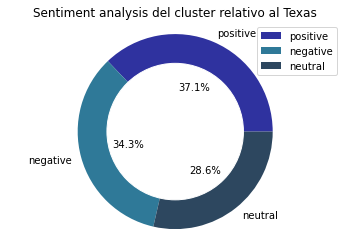

In [5]:
TexasCNT = [0,0,0]
TexasCNT[0] = TexasDF['overall score'].values.tolist().count("positive")
TexasCNT[1] = TexasDF['overall score'].values.tolist().count("negative")
TexasCNT[2] = TexasDF['overall score'].values.tolist().count("neutral")

TexasCNT
len(TexasDF.compound) == sum(TexasCNT)

# Donut plot - Texas
TexasLabels = 'positive','negative','neutral'
Colors = ['#2F329F','#2F7998','#2D475F'] # blue, turchese, grigio
plt.pie(TexasCNT,labels=TexasLabels,autopct='%1.1f%%',pctdistance=0.5,colors=Colors)
plt.title('Sentiment analysis del cluster relativo al Texas')
plt.axis('equal')
plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

TexasDF.to_excel(writer, sheet_name='TexasDF')

## Sentiment Analysis, Vaccini

Facciamo la stessa cosa per il cluster relativo ai vaccini.

In [6]:
# Calcolo i tweet positivi, negativi e neutri per il DF sulle aziende farmaceutiche
PharmaDF['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in PharmaDF.text_clean]
PharmaDF['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in PharmaDF.text_clean]
PharmaDF['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in PharmaDF.text_clean]
PharmaDF['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in PharmaDF.text_clean]
PharmaDF['overall score'] = [labeler(val) for val in PharmaDF.compound]

PharmaDF.iloc[:,11:16].head()

,positive,negative,neutral,compound,overall score
39,0.319,0.0,0.681,0.8519,positive
83,0.218,0.0,0.782,0.7964,positive
95,0.000,0.0,1.000,0.0000,neutral
114,0.076,0.0,0.924,0.1007,positive
181,0.099,0.0,0.901,0.4753,positive


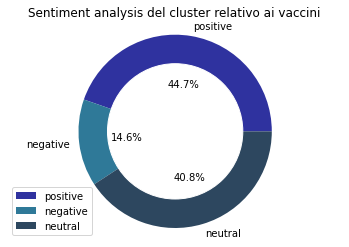

In [7]:
PharmaCNT = [0,0,0]
PharmaCNT[0] = PharmaDF['overall score'].values.tolist().count("positive")
PharmaCNT[1] = PharmaDF['overall score'].values.tolist().count("negative")
PharmaCNT[2] = PharmaDF['overall score'].values.tolist().count("neutral")

PharmaCNT
len(PharmaDF.compound) == sum(PharmaCNT)

# Donut plot - vaccini
PharmaLabels = 'positive','negative','neutral'
Colors = ['#2F329F','#2F7998','#2D475F'] # blue, turchese, grigio
plt.pie(PharmaCNT,labels=PharmaLabels,autopct='%1.1f%%',pctdistance=0.5,colors=Colors)
plt.title('Sentiment analysis del cluster relativo ai vaccini')
plt.axis('equal')
plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

PharmaDF.to_excel(writer, sheet_name='PharmaDF')

## Sentiment Analysis, Scuole

Finiamo questa prima parte con la sentiment analysis relativa al cluster sulel scuole. 

In [8]:
# Calcolo i tweet positivi, negativi e neutri per il DF sulle scuole
SchoolDF['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in SchoolDF.text_clean]
SchoolDF['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in SchoolDF.text_clean]
SchoolDF['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in SchoolDF.text_clean]
SchoolDF['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in SchoolDF.text_clean]
SchoolDF['overall score'] = [labeler(val) for val in SchoolDF.compound]

SchoolDF.iloc[:,11:16].head()

,positive,negative,neutral,compound,overall score
20,0.382,0.000,0.618,0.9117,positive
22,0.000,0.254,0.746,-0.5267,negative
23,0.000,0.000,1.000,0.0000,neutral
28,0.121,0.000,0.879,0.4404,positive
54,0.279,0.000,0.721,0.8176,positive


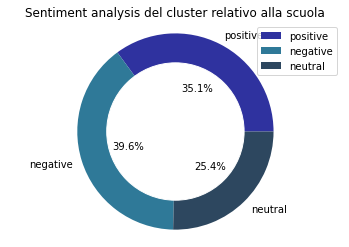

In [9]:
SchoolCNT = [0,0,0]
SchoolCNT[0] = SchoolDF['overall score'].values.tolist().count("positive")
SchoolCNT[1] = SchoolDF['overall score'].values.tolist().count("negative")
SchoolCNT[2] = SchoolDF['overall score'].values.tolist().count("neutral")

SchoolCNT
len(SchoolDF.compound) == sum(SchoolCNT)

# Donut plot - scuole
SchoolLabels = 'positive','negative','neutral'
Colors = ['#2F329F','#2F7998','#2D475F'] # blue, turchese, grigio
plt.pie(SchoolCNT,labels=SchoolLabels,autopct='%1.1f%%',pctdistance=0.5,colors=Colors)
plt.title('Sentiment analysis del cluster relativo alla scuola')
plt.axis('equal')
plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


SchoolDF.to_excel(writer, sheet_name='SchoolDF')
writer.save()

# Sentiment Analysis rispetto alla data di pubblicazione dei tweet

Analizziamo come varia la polarità dei tweet in funzione della data di pubblicazione dei vari tweet, sempre condizionatamente ai tre cluster in analisi. 
A tal proposito importiamo la libreria `datetime` e settiamo la working directory.

In [10]:
from datetime import datetime
import os as os
os.chdir('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis')

## Sentiment Analysis serie temporale, Texas

In [11]:
# Calcolo i tweet positivi, negativi e neutri per il DF sul Texas rispetto alla data di pubblicazione del tweet
TexasPosDF = pd.read_excel('Polarity.xlsx','TexasDF')
TexasPosDF = TexasPosDF.loc[TexasPosDF['overall score']=='positive'].sort_values(by='created_at_ntz')
TexasPosDF = TexasPosDF[~(TexasPosDF['created_at_ntz'] <= '2021-02-28')]
TexasPosDF['new_date'] = [d.date() for d in TexasPosDF['created_at_ntz']]
TexasPosDF['new_date'] = TexasPosDF['new_date'].astype("datetime64")

TexasNegDF = pd.read_excel('Polarity.xlsx','TexasDF')
TexasNegDF = TexasNegDF.loc[TexasNegDF['overall score']=='negative'].sort_values(by='created_at_ntz')
TexasNegDF = TexasNegDF[~(TexasNegDF['created_at_ntz'] <= '2021-02-28')]
TexasNegDF['new_date'] = [d.date() for d in TexasNegDF['created_at_ntz']]
TexasNegDF['new_date'] = TexasNegDF['new_date'].astype("datetime64")

TexasNeuDF = pd.read_excel('Polarity.xlsx','TexasDF')
TexasNeuDF = TexasNeuDF.loc[TexasNeuDF['overall score']=='neutral'].sort_values(by='created_at_ntz')
TexasNeuDF = TexasNeuDF[~(TexasNeuDF['created_at_ntz'] <= '2021-02-28')]
TexasNeuDF['new_date'] = [d.date() for d in TexasNeuDF['created_at_ntz']]
TexasNeuDF['new_date'] = TexasNeuDF['new_date'].astype("datetime64")

I tweet nel cluster relativo al Texas si distribuiscono rispetto alla data di pubblicazione nella seguente maniera:

In [12]:
TexasPosDF.groupby('new_date').size()

new_date
2021-03-01    33
2021-03-02    57
2021-03-03    49
2021-03-04    52
2021-03-05    49
2021-03-06    38
2021-03-07    39
2021-03-08     4
dtype: int64

In [13]:
TexasNegDF.groupby('new_date').size()

new_date
2021-03-01    34
2021-03-02    57
2021-03-03    52
2021-03-04    31
2021-03-05    37
2021-03-06    36
2021-03-07    47
2021-03-08     3
dtype: int64

Produciamo degli stacked barplot per vedere come varia la polarità dei tweet in funzione della data di pubblicazione.

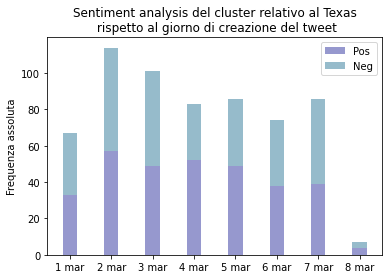

In [14]:
# Stacked Barplot - Texas: data di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['1 mar','2 mar','3 mar','4 mar','5 mar','6 mar','7 mar','8 mar']
ax.bar(labels, TexasPosDF.groupby('new_date').size(), width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, TexasNegDF.groupby('new_date').size(), width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=TexasPosDF.groupby('new_date').size())
ax.set_ylabel('Date')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo al Texas\n rispetto al giorno di creazione del tweet')
ax.legend()
plt.show()

## Sentiment Analysis serie temporale, Vaccini

Facciamo la stessa cosa per il cluster dei vaccini.

In [15]:
# Calcolo i tweet positivi, negativi e neutri per il DF sui vaccini rispetto alla data di pubblicazione del tweet
PharmaPosDF = pd.read_excel('Polarity.xlsx','PharmaDF')
PharmaPosDF = PharmaPosDF.loc[PharmaPosDF['overall score']=='positive'].sort_values(by='created_at_ntz')
PharmaPosDF = PharmaPosDF[~(PharmaPosDF['created_at_ntz'] <= '2021-02-28')]
PharmaPosDF['new_date'] = [d.date() for d in PharmaPosDF['created_at_ntz']]
PharmaPosDF['new_date'] = PharmaPosDF['new_date'].astype("datetime64")

PharmaNegDF = pd.read_excel('Polarity.xlsx','PharmaDF')
PharmaNegDF = PharmaNegDF.loc[PharmaNegDF['overall score']=='negative'].sort_values(by='created_at_ntz')
PharmaNegDF = PharmaNegDF[~(PharmaNegDF['created_at_ntz'] <= '2021-02-28')]
PharmaNegDF['new_date'] = [d.date() for d in PharmaNegDF['created_at_ntz']]
PharmaNegDF['new_date'] = PharmaNegDF['new_date'].astype("datetime64")

PharmaNeuDF = pd.read_excel('Polarity.xlsx','PharmaDF')
PharmaNeuDF = PharmaNeuDF.loc[PharmaNeuDF['overall score']=='neutral'].sort_values(by='created_at_ntz')
PharmaNeuDF = PharmaNeuDF[~(PharmaNeuDF['created_at_ntz'] <= '2021-02-28')]
PharmaNeuDF['new_date'] = [d.date() for d in PharmaNeuDF['created_at_ntz']]
PharmaNeuDF['new_date'] = PharmaNeuDF['new_date'].astype("datetime64")

PhPos = PharmaPosDF.groupby('new_date').size()
PhNeg = PharmaNegDF.groupby('new_date').size()

PharmaPosDF.groupby('new_date').size()

new_date
2021-03-01     8
2021-03-02     2
2021-03-03     9
2021-03-04    10
2021-03-05    10
2021-03-06     4
2021-03-07     3
dtype: int64

In [16]:
PharmaNegDF.groupby('new_date').size()

new_date
2021-03-01    3
2021-03-02    4
2021-03-03    3
2021-03-04    2
2021-03-05    1
2021-03-07    2
dtype: int64

Si può notare come in alcuni giorni non sono stati prodotti tweet con polarità positiva o negativa. Poiché questo potrebbe creare problemi nella visualizzazione dei dati svolgiamo il seguente ciclo `while`.

In [17]:
TMP = PhNeg
PhNeg = PhPos
i=0
while i < len(PhPos):
    if i < 5:
        PhNeg[i] = TMP[i]
    elif i == 5:
        PhNeg[i] = 0
    elif i == 6:
        PhNeg[i] = TMP[i-1]
    i = i+1

PhPos = PharmaPosDF.groupby('new_date').size()

Produciamo anche in questo caso gli stacked barplot.

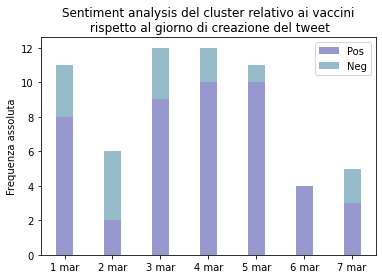

In [18]:
# Stacked Barplot - vaccini: data di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['1 mar','2 mar','3 mar','4 mar','5 mar','6 mar','7 mar']
ax.bar(labels, PhPos, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, PhNeg, width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=PhPos)
ax.set_ylabel('Date')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo ai vaccini\n rispetto al giorno di creazione del tweet')
ax.legend()
plt.show()

## Sentiment Analysis serie temporale, Scuola

Facciamo la stessa cosa per il cluster della scuola.

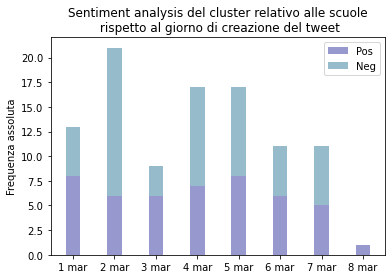

In [19]:
SchoolPosDF = pd.read_excel('Polarity.xlsx','SchoolDF')
SchoolPosDF = SchoolPosDF.loc[SchoolPosDF['overall score']=='positive'].sort_values(by='created_at_ntz')
SchoolPosDF = SchoolPosDF[~(SchoolPosDF['created_at_ntz'] <= '2021-02-28')]
SchoolPosDF['new_date'] = [d.date() for d in SchoolPosDF['created_at_ntz']]
SchoolPosDF['new_date'] = SchoolPosDF['new_date'].astype("datetime64")

SchoolNegDF = pd.read_excel('Polarity.xlsx','SchoolDF')
SchoolNegDF = SchoolNegDF.loc[SchoolNegDF['overall score']=='negative'].sort_values(by='created_at_ntz')
SchoolNegDF = SchoolNegDF[~(SchoolNegDF['created_at_ntz'] <= '2021-02-28')]
SchoolNegDF['new_date'] = [d.date() for d in SchoolNegDF['created_at_ntz']]
SchoolNegDF['new_date'] = SchoolNegDF['new_date'].astype("datetime64")

SchoolNeuDF = pd.read_excel('Polarity.xlsx','SchoolDF')
SchoolNeuDF = SchoolNeuDF.loc[SchoolNeuDF['overall score']=='neutral'].sort_values(by='created_at_ntz')
SchoolNeuDF = SchoolNeuDF[~(SchoolNeuDF['created_at_ntz'] <= '2021-02-28')]
SchoolNeuDF['new_date'] = [d.date() for d in SchoolNeuDF['created_at_ntz']]
SchoolNeuDF['new_date'] = SchoolNeuDF['new_date'].astype("datetime64")

ScPos = SchoolPosDF.groupby('new_date').size()
ScNeg = SchoolNegDF.groupby('new_date').size()
SchoolNeuDF.groupby('new_date').size()

TMP = ScNeg
ScNeg = ScPos
i = 0
while i < len(ScPos):
    if i < 7:
        ScNeg[i] = TMP[i]
    if i == 7:
        ScNeg[i] = 0
    i = i+1

ScPos = SchoolPosDF.groupby('new_date').size()

# # Stacked Barplot - scuole: data di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['1 mar','2 mar','3 mar','4 mar','5 mar','6 mar','7 mar','8 mar']
ax.bar(labels, ScPos, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, ScNeg, width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=ScPos)
ax.set_ylabel('Date')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo alle scuole\n rispetto al giorno di creazione del tweet')
ax.legend()
plt.show()

# Sentiment Analysis rispetto all'ora di pubblicazione del tweet

Svolgiamo un'analisi analoga questa volta però rispetto all'ora di pubblicazione del tweet e vediamo come varia la distribuzione della polarità in funzione dell'orario di pubblicazione. 
Prima definiamo la funzione counter che servirà per conteggiare i vari tweet in funzione dell'orario di pubblicazione. 

In [20]:
def counter(series):
    cnt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for line in series:
        cnt[int(line)] = cnt[int(line)] + 1
    return cnt

Anche in questo caso produciamo degli stacked barplot relativi ai tre cluster in analisi.

## Sentiment Analysis rispetto all'orario, Texas

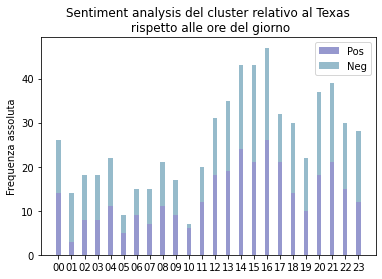

In [21]:
# Calcolo i tweet positivi, negativi e neutri per il DF sul Texas rispetto all'ora di pubblicazione del tweet
TexasHourDF = pd.read_excel('Polarity.xlsx','TexasDF')
TexasHourDF['hour'] = pd.to_datetime(TexasHourDF['created_at_ntz'],format = '%H:%M:%S').dt.hour
TexasHourDF = TexasHourDF.sort_values(by='hour')

TexasHourPos = TexasHourDF.loc[TexasHourDF['overall score']=='positive']
TexasHourNeg = TexasHourDF.loc[TexasHourDF['overall score']=='negative']
TexasHourNeu = TexasHourDF.loc[TexasHourDF['overall score']=='neutral']

TxPosHour = counter(TexasHourPos['hour'])
TxNegHour = counter(TexasHourNeg['hour'])

# Stacked Barplot - Texas: ora di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax.bar(labels, TxPosHour, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, TxNegHour, width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=TxPosHour)
ax.set_ylabel('Ore del giorno')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo al Texas\n rispetto alle ore del giorno')
ax.legend()
plt.show()

## Sentiment Analysis rispetto all'orario, Vaccini

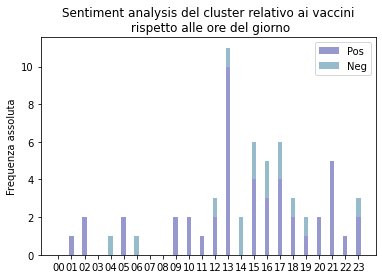

In [22]:
# Calcolo i tweet positivi, negativi e neutri per il DF sui vaccini rispetto all'ora di pubblicazione del tweet
PharmaHourDF = pd.read_excel('Polarity.xlsx','PharmaDF')
PharmaHourDF['hour'] = pd.to_datetime(PharmaHourDF['created_at_ntz'],format = '%H:%M:%S').dt.hour
PharmaHourDF = PharmaHourDF.sort_values(by='hour')

PharmaHourPos = PharmaHourDF.loc[PharmaHourDF['overall score']=='positive']
PharmaHourNeg = PharmaHourDF.loc[PharmaHourDF['overall score']=='negative']
PharmaHourNeu = PharmaHourDF.loc[PharmaHourDF['overall score']=='neutral']

PhPosHour = counter(PharmaHourPos['hour'])
PhNegHour = counter(PharmaHourNeg['hour'])

# Stacked Barplot - vaccini: ora di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax.bar(labels, PhPosHour, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, PhNegHour, width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=PhPosHour)
ax.set_ylabel('Ore del giorno')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo ai vaccini\n rispetto alle ore del giorno')
ax.legend()
plt.show()

## Sentiment Analysis rispetto all'orario, Scuola

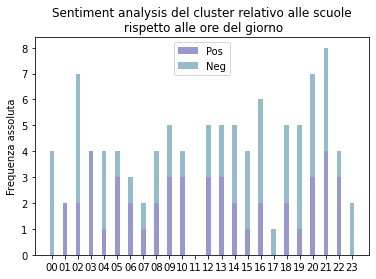

In [23]:
# Calcolo i tweet positivi, negativi e neutri per il DF sulla scuola rispetto all'ora di pubblicazione del tweet
SchoolHourDF = pd.read_excel('Polarity.xlsx','SchoolDF')
SchoolHourDF['hour'] = pd.to_datetime(SchoolHourDF['created_at_ntz'],format = '%H:%M:%S').dt.hour
SchoolHourDF = SchoolHourDF.sort_values(by='hour')

SchoolHourPos = SchoolHourDF.loc[SchoolHourDF['overall score']=='positive']
SchoolHourNeg = SchoolHourDF.loc[SchoolHourDF['overall score']=='negative']
SchoolHourNeu = SchoolHourDF.loc[SchoolHourDF['overall score']=='neutral']

ScPosHour = counter(SchoolHourPos['hour'])
ScNegHour = counter(SchoolHourNeg['hour'])

# Stacked Barplot - scuole: ora di pubblicazione
width = 0.35       
fig, ax = plt.subplots()
labels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ax.bar(labels, ScPosHour, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(labels, ScNegHour, width, label='Neg', color = '#2F7998', alpha = 0.5, bottom=ScPosHour)
ax.set_ylabel('Ore del giorno')
ax.set_ylabel('Frequenza assoluta')
ax.set_title('Sentiment analysis del cluster relativo alle scuole\n rispetto alle ore del giorno')
ax.legend()
plt.show()

# Sentiment Analysis rispetto al numero di *Mi Piace* del tweet

Analizziamo adesso la distribuzione della polarità dei vari tweet in funzione dei *mi piace* del tweet.
Anche in questo caso l'analisi sarà svolta condizionatamente ai cluster. 

Per potere fare quanto detto dividiamo tweet in base al loro numero di mi piace. 
In questo caso i barplot saranno visualizzati su scala del logaritmo di 2 per vedere meglio i dati. In questo caso anziché utilizzare degli stacked barplot useremo dei barplot multipli. 

Definiamo quindi le seguenti funzioni:

`favCounter` crea un vettore di conteggi in cui contiamo quanti tweet hanno ottenuto un certo numero di mi piace.

In [24]:
def favCounter(series):
    cnt = np.zeros(max(series)-min(series)+1,dtype=int)
    for num in series:
        cnt[num] = cnt[num] + 1
    return cnt

`shrinker` fa sì che ogni tweet venga assegnato alla delle classi di appartenenza in base al numero di *mi piace*, cioè il tweet può essere assegnato alla classe di '0' mi piace, di '1-10' mi piace, di '10-20' mi piace, di '20-50' mi piace e così via.

In [25]:
def shrinker(series):
    histCnt = np.zeros(12,dtype=int)
    i = 0
    for num in series:
        if i == 0:
            histCnt[i] = histCnt[i] + num
        elif i > 0 and i <= 10:
            histCnt[0] = histCnt[0] + num
        elif i > 10 and i <= 20:
            histCnt[1] = histCnt[1] + num
        elif i > 20 and i <= 50:
            histCnt[2] = histCnt[2] + num
        elif i > 50 and i <= 100:
            histCnt[3] = histCnt[3] + num
        elif i > 100 and i <= 200:
            histCnt[4] = histCnt[4] + num
        elif i > 200 and i <= 500:
            histCnt[5] = histCnt[5] + num
        elif i > 500 and i <= 1000:
            histCnt[6] = histCnt[6] + num
        elif i > 1000 and i <= 2000:
            histCnt[7] = histCnt[7] + num
        elif i > 2000 and i <= 5000:
            histCnt[8] = histCnt[8] + num
        elif i > 5000 and i <= 10000:
            histCnt[9] = histCnt[9] + num
        else:
            histCnt[10] = histCnt[10] + num
        i = i+1
    return histCnt

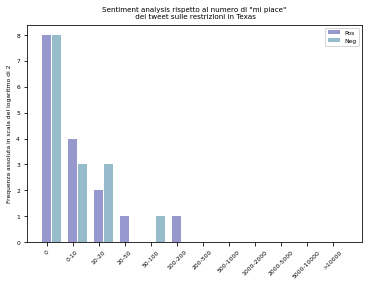

In [26]:
# Texas

dataTexas = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=0)
fav_countDFTexas=pd.DataFrame(dataTexas)

fav_countDFTexas['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in fav_countDFTexas.text_clean]
fav_countDFTexas['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in fav_countDFTexas.text_clean]
fav_countDFTexas['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in fav_countDFTexas.text_clean]
fav_countDFTexas['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in fav_countDFTexas.text_clean]
fav_countDFTexas['overall score'] = [labeler(val) for val in fav_countDFTexas.compound]

fav_countPosDFTexas = fav_countDFTexas.loc[fav_countDFTexas['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
fav_countNegDFTexas = fav_countDFTexas.loc[fav_countDFTexas['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
favPosCntTexas = shrinker(favCounter(fav_countPosDFTexas))
i = 0
for num in favPosCntTexas:
    if num != 0:
        favPosCntTexas[i] = np.log2(favPosCntTexas[i])
    i = i+1

favNegCntTexas = shrinker(favCounter(fav_countNegDFTexas))
i = 0
for num in favNegCntTexas:
    if num != 0:
        favNegCntTexas[i] = np.log2(favNegCntTexas[i])
    i = i+1
 

plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,12,12) - 0.64*np.ones(12)
labels = ['0','0-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','5000-10000','>10000']
ax.bar(labels, favPosCntTexas, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, favNegCntTexas, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di "mi piace"\n dei tweet sulle restrizioni in Texas')
ax.legend()
plt.show()

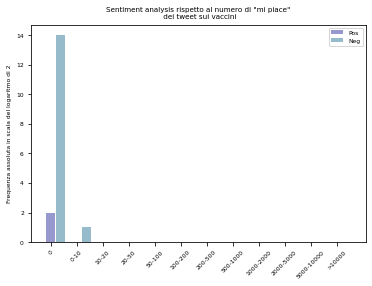

In [27]:
# Pharma

dataPharma = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=1)
fav_countDFPharma=pd.DataFrame(dataPharma)

fav_countDFPharma['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in fav_countDFPharma.text_clean]
fav_countDFPharma['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in fav_countDFPharma.text_clean]
fav_countDFPharma['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in fav_countDFPharma.text_clean]
fav_countDFPharma['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in fav_countDFPharma.text_clean]
fav_countDFPharma['overall score'] = [labeler(val) for val in fav_countDFPharma.compound]

fav_countPosDFPharma = fav_countDFPharma.loc[fav_countDFPharma['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
fav_countNegDFPharma = fav_countDFPharma.loc[fav_countDFPharma['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
favPosCntPharma = shrinker(favCounter(fav_countPosDFPharma))
i = 0
for num in favPosCntPharma:
    if num != 0:
        favPosCntPharma[i] = np.log2(favPosCntPharma[i])
    i = i+1

favNegCntPharma = shrinker(favCounter(fav_countNegDFPharma))
i = 0
for num in favPosCntPharma:
    if num != 0:
        favPosCntPharma[i] = np.log2(favPosCntPharma[i])
    i = i+1

plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,12,12) - 0.64*np.ones(12)
labels = ['0','0-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','5000-10000','>10000']
ax.bar(labels, favPosCntPharma, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, favNegCntPharma, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di "mi piace"\n dei tweet sui vaccini')
ax.legend()
plt.show()

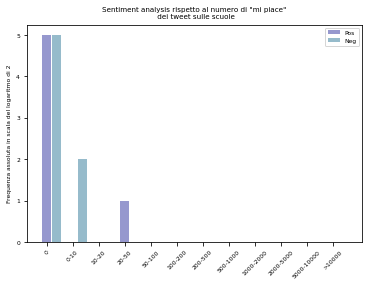

In [28]:
# School

dataSchool = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=2)
fav_countDFSchool=pd.DataFrame(dataSchool)

fav_countDFSchool['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in fav_countDFSchool.text_clean]
fav_countDFSchool['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in fav_countDFSchool.text_clean]
fav_countDFSchool['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in fav_countDFSchool.text_clean]
fav_countDFSchool['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in fav_countDFSchool.text_clean]
fav_countDFSchool['overall score'] = [labeler(val) for val in fav_countDFSchool.compound]

fav_countPosDFSchool = fav_countDFSchool.loc[fav_countDFSchool['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
fav_countNegDFSchool = fav_countDFSchool.loc[fav_countDFSchool['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
favPosCntSchool = shrinker(favCounter(fav_countPosDFSchool))
i = 0
for num in favPosCntSchool:
    if num != 0:
        favPosCntSchool[i] = np.log2(favPosCntSchool[i])
    i = i+1

favNegCntSchool = shrinker(favCounter(fav_countNegDFSchool))
i = 0
for num in favNegCntSchool:
    if num != 0:
        favNegCntSchool[i] = np.log2(favNegCntSchool[i])
    i = i+1

plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,12,12) - 0.64*np.ones(12)
labels = ['0','0-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','5000-10000','>10000']
ax.bar(labels, favPosCntSchool, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, favNegCntSchool, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di "mi piace"\n dei tweet sulle scuole')
ax.legend()
plt.show()

# Sentiment Analysis rispetto al numero di retweet del tweet

Analizziamo adesso la distribuzione della polarità dei vari tweet in funzione dei retweet del tweet.
Anche in questo caso l'analisi sarà svolta condizionatamente ai cluster. 

Seguiamo un approccio pressoché identico a quello dei *mi piace*.

Definiamo delle funzioni con cui possiamo conteggiare e partizionare i tweet in base al numero di retweet associato a ognuno di essi.

In [29]:
def RTCounter(series):
    cnt = np.zeros(max(series)-min(series)+1,dtype=int)
    for num in series:
        cnt[num] = cnt[num] + 1
    return cnt

def RTshrinker(series):
    histCnt = np.zeros(11,dtype=int)
    i = 0
    for num in series:
        if i == 0:
            histCnt[0] = histCnt[0] + num
        elif i > 0 and i <= 10:
            histCnt[1] = histCnt[1] + num
        elif i > 10 and i <= 20:
            histCnt[2] = histCnt[2] + num
        elif i > 20 and i <= 50:
            histCnt[3] = histCnt[3] + num
        elif i > 50 and i <= 100:
            histCnt[4] = histCnt[4] + num
        elif i > 100 and i <= 200:
            histCnt[5] = histCnt[5] + num
        elif i > 200 and i <= 500:
            histCnt[6] = histCnt[6] + num
        elif i > 500 and i <= 1000:
            histCnt[7] = histCnt[7] + num
        elif i > 1000 and i <= 2000:
            histCnt[8] = histCnt[8] + num
        elif i > 2000 and i <= 5000:
            histCnt[9] = histCnt[9] + num
        else:
            histCnt[10] = histCnt[10] + num
        i = i+1
    return histCnt

Svolgiamo l'analisi per ogni cluster.

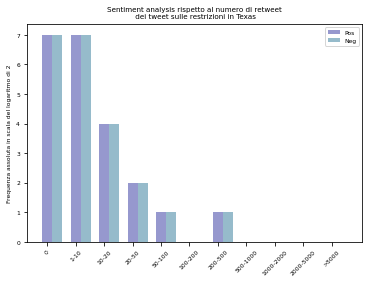

In [30]:
# Texas

dataTexas = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=0)
RT_countDFTexas=pd.DataFrame(dataTexas)

RT_countDFTexas['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in RT_countDFTexas.text_clean]
RT_countDFTexas['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in RT_countDFTexas.text_clean]
RT_countDFTexas['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in RT_countDFTexas.text_clean]
RT_countDFTexas['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in RT_countDFTexas.text_clean]
RT_countDFTexas['overall score'] = [labeler(val) for val in RT_countDFTexas.compound]

RT_countPosDFTexas = RT_countDFTexas.loc[RT_countDFTexas['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
RT_countNegDFTexas = RT_countDFTexas.loc[RT_countDFTexas['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
RTPosCntTexas = RTshrinker(RTCounter(RT_countPosDFTexas))
RTNegCntTexas = RTshrinker(RTCounter(RT_countNegDFTexas))

i = 0
for num in RTPosCntTexas:
    if num != 0:
        RTPosCntTexas[i] = np.log2(RTPosCntTexas[i])
    i = i+1

i = 0
for num in RTNegCntTexas:
    if num != 0:
        RTNegCntTexas[i] = np.log2(RTNegCntTexas[i])
    i = i+1

plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,11,11) - 0.65*np.ones(11)
labels = ['0','1-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','>5000']
ax.bar(labels, RTPosCntTexas, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, RTPosCntTexas, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di retweet\n dei tweet sulle restrizioni in Texas')
ax.legend()
plt.show()


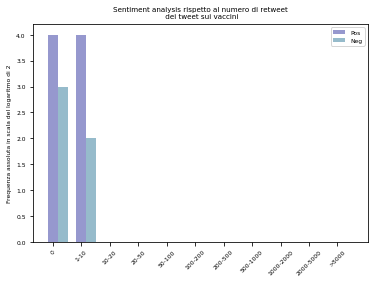

In [31]:
# Pharma

dataPharma = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=1)
RT_countDFPharma=pd.DataFrame(dataPharma)

RT_countDFPharma['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in RT_countDFPharma.text_clean]
RT_countDFPharma['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in RT_countDFPharma.text_clean]
RT_countDFPharma['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in RT_countDFPharma.text_clean]
RT_countDFPharma['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in RT_countDFPharma.text_clean]
RT_countDFPharma['overall score'] = [labeler(val) for val in RT_countDFPharma.compound]

RT_countPosDFPharma = RT_countDFPharma.loc[RT_countDFPharma['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
RT_countNegDFPharma = RT_countDFPharma.loc[RT_countDFPharma['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
RTPosCntPharma = RTshrinker(RTCounter(RT_countPosDFPharma))
RTNegCntPharma = RTshrinker(RTCounter(RT_countNegDFPharma))

i = 0
for num in RTPosCntPharma:
    if num != 0:
        RTPosCntPharma[i] = np.log2(RTPosCntPharma[i])
    i = i+1

i = 0
for num in RTNegCntPharma:
    if num != 0:
        RTNegCntPharma[i] = np.log2(RTNegCntPharma[i])
    i = i+1

plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,11,11) - 0.65*np.ones(11)
labels = ['0','1-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','>5000']
ax.bar(labels, RTPosCntPharma, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, RTNegCntPharma, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di retweet\n dei tweet sui vaccini')
ax.legend()
plt.show()

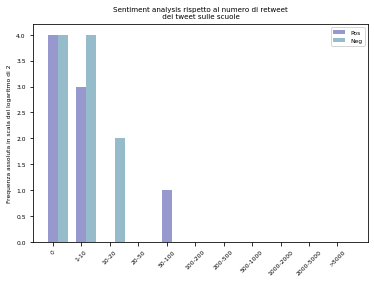

In [32]:
# School

dataSchool = pd.read_excel('C:/Users/gsppp/OneDrive/Poli/Quarto Anno/Business Intelligence per Big Data/Progetto/ProgettoBIClusterAnalysis/Polarity.xlsx',sheet_name=2)
RT_countDFSchool=pd.DataFrame(dataSchool)

RT_countDFSchool['positive'] = [sia.polarity_scores(str(tweet))['pos'] for tweet in RT_countDFSchool.text_clean]
RT_countDFSchool['negative'] = [sia.polarity_scores(str(tweet))['neg'] for tweet in RT_countDFSchool.text_clean]
RT_countDFSchool['neutral'] = [sia.polarity_scores(str(tweet))['neu'] for tweet in RT_countDFSchool.text_clean]
RT_countDFSchool['compound'] = [sia.polarity_scores(str(tweet))['compound'] for tweet in RT_countDFSchool.text_clean]
RT_countDFSchool['overall score'] = [labeler(val) for val in RT_countDFSchool.compound]

RT_countPosDFSchool = RT_countDFSchool.loc[RT_countDFSchool['overall score']=='positive'].sort_values(by='favorite_count')['favorite_count']
RT_countNegDFSchool = RT_countDFSchool.loc[RT_countDFSchool['overall score']=='negative'].sort_values(by='favorite_count')['favorite_count']

# Per chiarezza i conteggi dei "mi piaci" li riportiamo in scala di log2
RTPosCntSchool = RTshrinker(RTCounter(RT_countPosDFSchool))
RTNegCntSchool = RTshrinker(RTCounter(RT_countNegDFSchool))

i = 0
for num in RTPosCntSchool:
    if num != 0:
        RTPosCntSchool[i] = np.log2(RTPosCntSchool[i])
    i = i+1

i = 0
for num in RTNegCntSchool:
    if num != 0:
        RTNegCntSchool[i] = np.log2(RTNegCntSchool[i])
    i = i+1
    
plt.rcParams['font.size'] = 6
width = 0.35       
fig, ax = plt.subplots()
x = np.linspace(1,11,11) - 0.65*np.ones(11)
labels = ['0','1-10','10-20','20-50','50-100','100-200','200-500','500-1000','1000-2000','2000-5000','>5000']
ax.bar(labels, RTPosCntSchool, width, label='Pos', color = '#2F329F', alpha = 0.5)
ax.bar(x, RTNegCntSchool, width, label='Neg', color = '#2F7998', alpha = 0.5)
plt.xticks(rotation=45)
ax.set_ylabel('Numero di link nel tweet')
ax.set_ylabel('Frequenza assoluta in scala del logaritmo di 2')
ax.set_title('Sentiment analysis rispetto al numero di retweet\n dei tweet sulle scuole')
ax.legend()
plt.show()